Task 4: Expert Sales Prediction

In [1]:
import pandas as pd
df = pd.read_csv('advertising.csv')
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       6

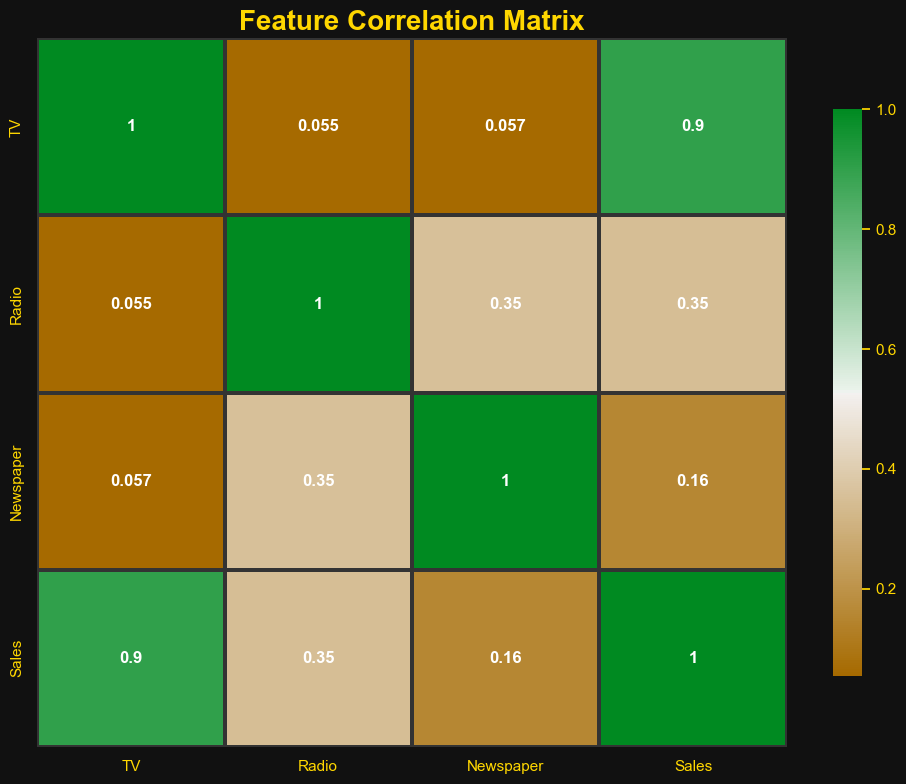

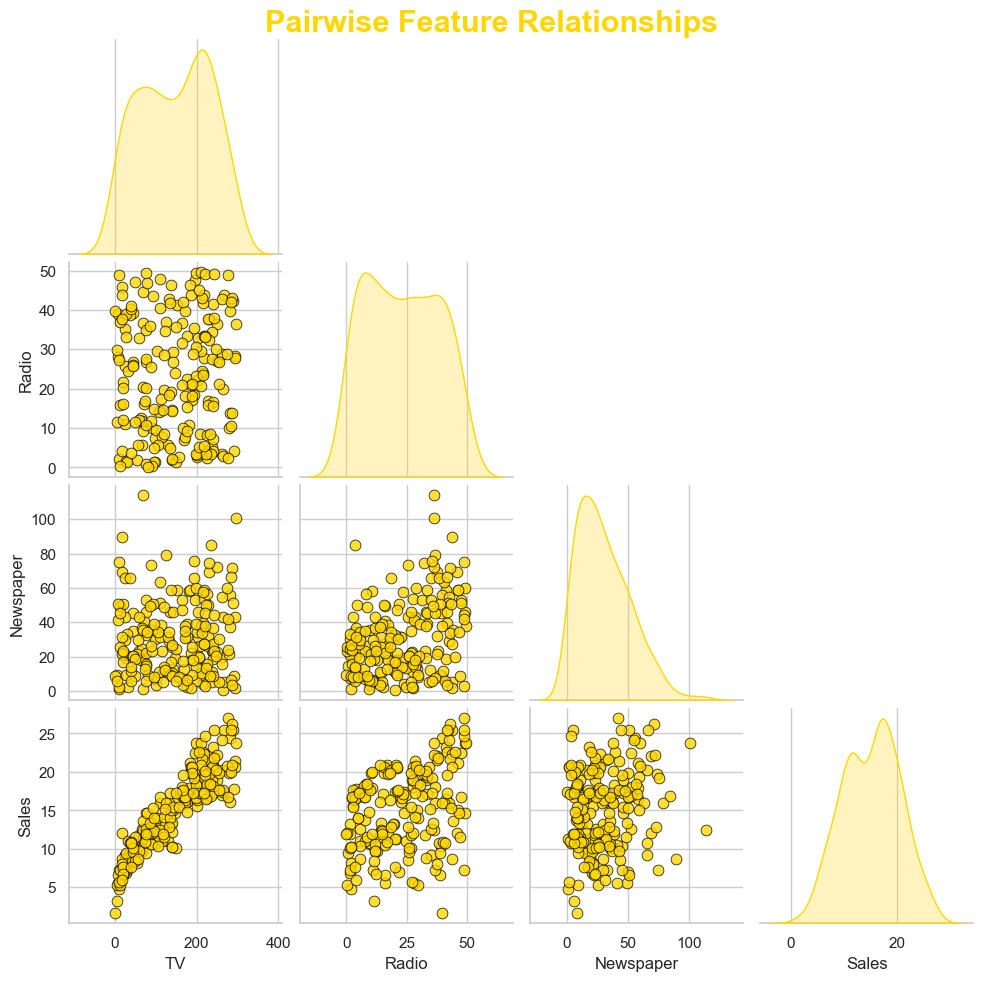

<Figure size 640x480 with 0 Axes>

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="darkgrid", rc={"axes.facecolor": "#111", "figure.facecolor": "#111"})

custom_cmap = sns.diverging_palette(45, 130, s=100, l=50, as_cmap=True)

plt.rcParams.update({
    "axes.titlesize": 18,
    "axes.titleweight": 'bold',
    "axes.labelcolor": "#FFD700",
    "xtick.color": "#FFD700",
    "ytick.color": "#FFD700",
    "axes.edgecolor": "#FFD700",
    "grid.color": "#444444",
    "text.color": "#FFD700",
    "font.family": "sans-serif"
})

df = pd.read_csv("advertising.csv")

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap=custom_cmap, linewidths=1.5, linecolor='#333', 
            annot_kws={"fontsize": 12, "weight": "bold", "color": "#FFFFFF"}, cbar_kws={"shrink": 0.8})
plt.title("Feature Correlation Matrix", color='#FFD700', weight='bold', fontsize=20)
plt.tight_layout()
plt.show()

sns.set_style("whitegrid")
pairplot = sns.pairplot(df, diag_kind="kde", 
                        plot_kws={"color": "#FFD700", "s": 60, "edgecolor": "#000", "alpha": 0.8},
                        diag_kws={"color": "#FFD700", "fill": True}, 
                        corner=True)
pairplot.fig.suptitle("Pairwise Feature Relationships", fontsize=22, color='#FFD700', weight='bold')
pairplot.fig.subplots_adjust(top=0.95)  
plt.show()
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches="tight")


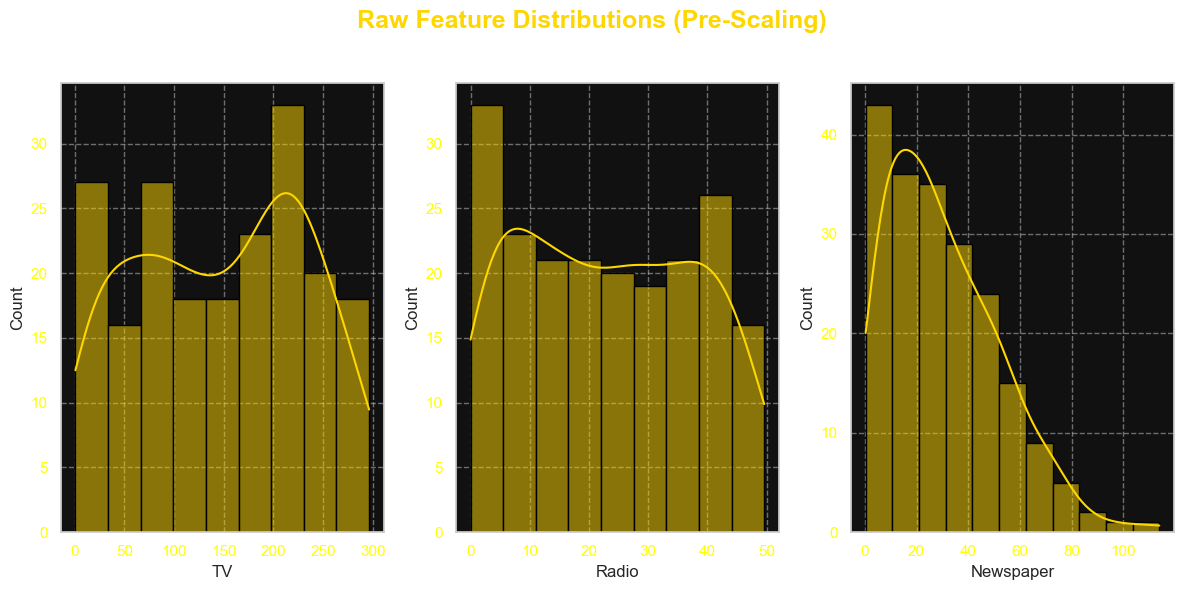

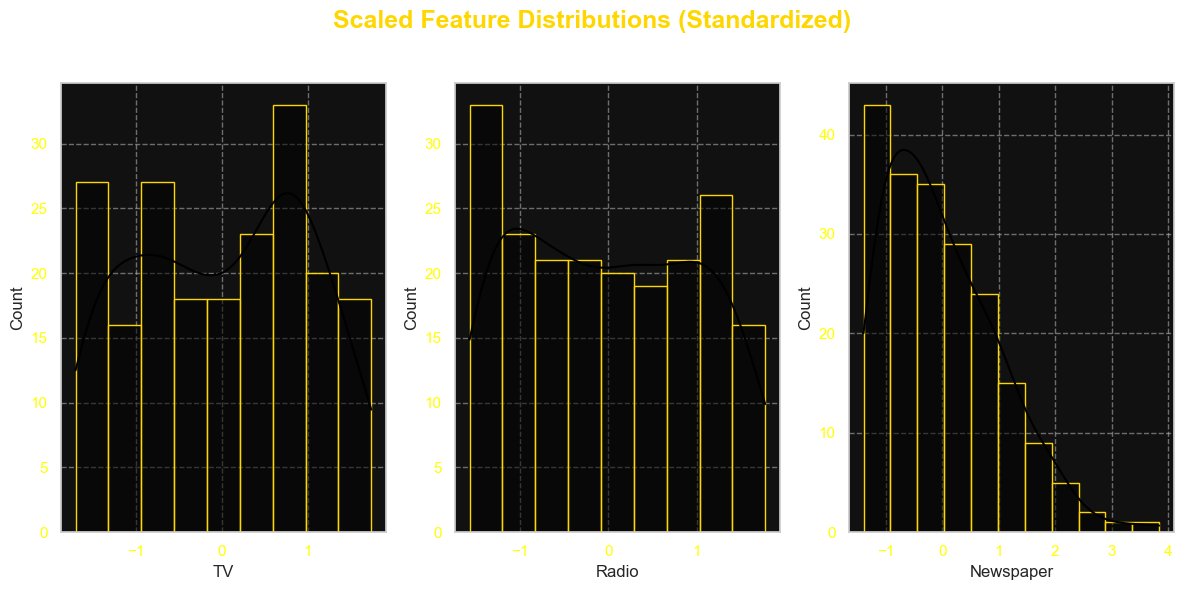

 Data Split Complete:
• Training Samples: 160
• Testing Samples: 40


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("advertising.csv")


feature_cols = ['TV', 'Radio', 'Newspaper']
target_col = 'Sales'

X = df[feature_cols]
y = df[target_col]


plt.figure(figsize=(12, 6))
for i, col in enumerate(feature_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(X[col], kde=True, color='#FFD700', edgecolor='black')
    plt.title(f"Raw Distribution: {col}", color='white')
    plt.xlabel(col)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().set_facecolor('#111')
    plt.tick_params(colors='yellow')

plt.suptitle("Raw Feature Distributions (Pre-Scaling)", fontsize=18, color='#FFD700', weight='bold')
plt.tight_layout()
plt.show()


numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, feature_cols)
    ]
)

X_scaled = preprocessor.fit_transform(X)


X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)

plt.figure(figsize=(12, 6))
for i, col in enumerate(feature_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(X_scaled_df[col], kde=True, color='black', edgecolor='#FFD700', fill=True)
    plt.title(f"Scaled: {col}", color='white')
    plt.xlabel(col)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().set_facecolor('#111')
    plt.tick_params(colors='yellow')

plt.suptitle("Scaled Feature Distributions (Standardized)", fontsize=18, color='#FFD700', weight='bold')
plt.tight_layout()
plt.show()


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\033[1;33m Data Split Complete:\033[0m")
print(f"\033[1;37m• Training Samples:\033[0m {X_train.shape[0]}")
print(f"\033[1;37m• Testing Samples:\033[0m {X_test.shape[0]}")


In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "SVR": SVR()
}

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Load your dataset
df = pd.read_csv("advertising.csv")

# 2. Define features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# 3. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
print("Model Performance Evaluation \n" + "="*50)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    cv_r2 = cross_val_score(model, X_scaled, y, scoring='r2', cv=5)

    print(f" {name}")
    print(f"  R² Score     : {r2:.3f}")
    print(f"  MAE          : {mae:.3f}")
    print(f"  RMSE         : {rmse:.3f}")
    print(f"  CV R² (mean) : {cv_r2.mean():.3f}")
    print("="*50)


Model Performance Evaluation 
 Linear Regression
  R² Score     : 0.906
  MAE          : 1.275
  RMSE         : 1.705
  CV R² (mean) : 0.895
 Ridge
  R² Score     : 0.906
  MAE          : 1.273
  RMSE         : 1.707
  CV R² (mean) : 0.895
 Lasso
  R² Score     : 0.906
  MAE          : 1.272
  RMSE         : 1.705
  CV R² (mean) : 0.896
 Random Forest
  R² Score     : 0.954
  MAE          : 0.916
  RMSE         : 1.198
  CV R² (mean) : 0.942
 XGBoost
  R² Score     : 0.953
  MAE          : 0.890
  RMSE         : 1.205
  CV R² (mean) : 0.936
 SVR
  R² Score     : 0.861
  MAE          : 1.529
  RMSE         : 2.074
  CV R² (mean) : 0.832


C:\Users\Shreya Joshi\AppData\Local\Temp\ipykernel_13144\3818302266.py:16: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  plt.tight_layout()


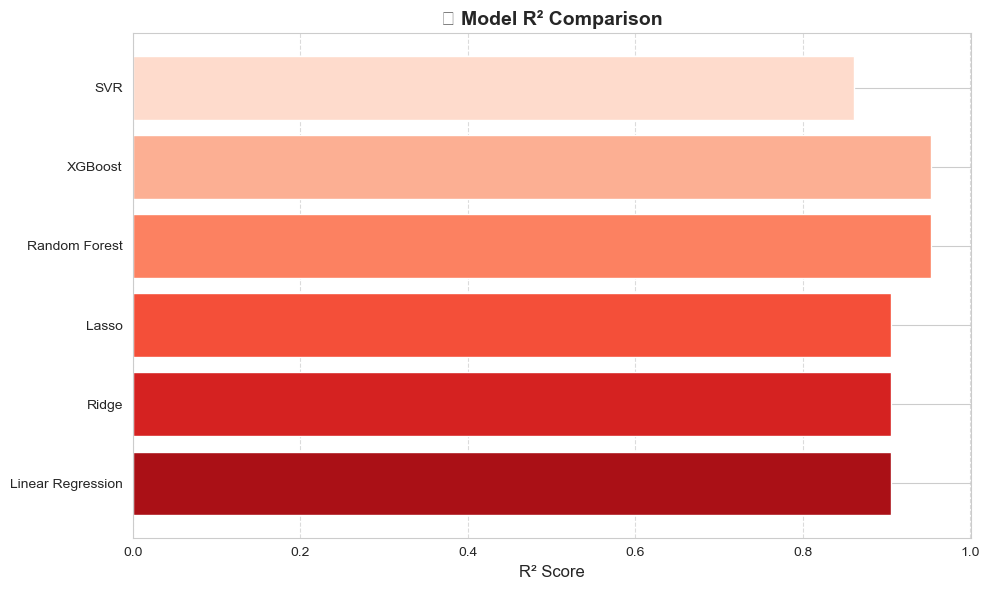

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
colors = sns.color_palette("Reds_r", len(r2_scores))

# Bar Plot
plt.barh(list(r2_scores.keys()), list(r2_scores.values()), color=colors)
plt.xlabel("R² Score", fontsize=12)
plt.title("🔴 Model R² Comparison", fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


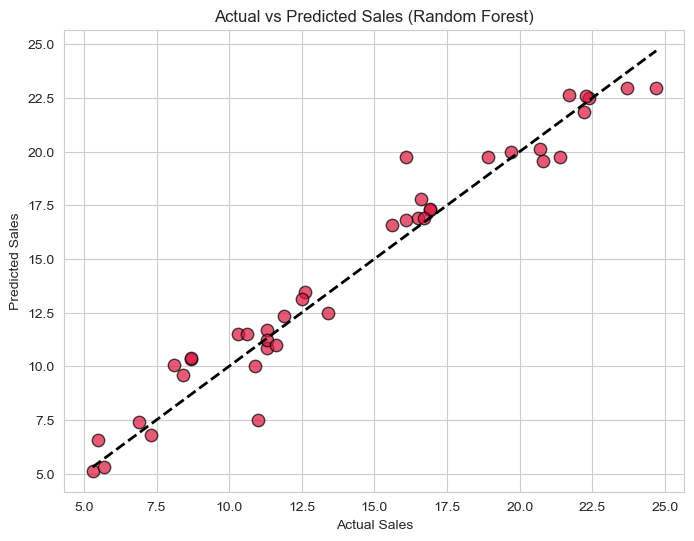

In [19]:
best_model_name = max(r2_scores, key=r2_scores.get)
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='crimson', edgecolors='k', s=80, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(f"Actual vs Predicted Sales ({best_model_name})")
plt.grid(True)
plt.show()